In [3]:
import os
import glob
from pathlib import Path

os.chdir("/mnt/4TB1/onj/")

# TODO: change whenever dataset version changes
DATADIR = "/mnt/4TB1/onj/dataset/v0/"
datadir = Path(DATADIR)

### 1. Preprocess Data

In [4]:
onj = glob.glob(DATADIR + "ONJ_labeling/*/", recursive=True)
# non_onj = glob.glob(DATADIR + "Non_ONJ/*/", recursive=True)

from sklearn.model_selection import train_test_split

# patient
# X = onj + non_onj 
X = onj

# TODO: later subdivide label to 0 ~ 4 (0: Non-ONJ, 1: ONJ-stage1, 2: ONJ-stage2, 3: ONJ-stage3, 4: ONJ-stage4)
# label
# y = [1]*len(onj) + [0]*len(non_onj) 
y = [1]*len(onj)
folders = set()
for patient in X:
    folders.update((x.split("/")[-2] for x in glob.glob(patient + "*/")))

folders

{'BoneSCAN', 'BoneSPECT', 'CBCT', 'ClinicalPicture', 'MDCT', 'panorama'}

In [10]:
for f in onj:
    # print(f.parent.parent.parent.parent.name)
    if f.parent.name == "panorama": # panorma/date.jpg
        continue
    if f.name == "임상정보.jpg": # 임상정보.jpg
        continue
    if f.parent.parent.parent.parent.name not in folders:
        print(f)

    

In [11]:
onj = glob.glob(DATADIR + "ONJ/*/", recursive=True)
non_onj = glob.glob(DATADIR + "Non_ONJ/*/", recursive=True)

from sklearn.model_selection import train_test_split

# patient
X = onj + non_onj 

# TODO: later subdivide label to 0 ~ 4 (0: Non-ONJ, 1: ONJ-stage1, 2: ONJ-stage2, 3: ONJ-stage3, 4: ONJ-stage4)
# label
y = [1]*len(onj) + [0]*len(non_onj) 

```folders = set()
for patient in X:
    folders.update((x.split("/")[-2] for x in glob.glob(patient + "*/")))

folders: 

{'Bone SCAN',
 'BoneSCAN',
 'BoneSPECT',
 'Bonescan',
 'Bonespect',
 'CBCT',
 'MDCT',
 'panorama',
 '임상사진'}
 ```

Standardize folder name

In [12]:
# Mapping of non-standard to standard names
standardization_map = {
    'Bone SCAN': 'BoneSCAN',
    'Bonescan': 'BoneSCAN',
    'BoneSPECT': 'BoneSPECT',
    'Bonespect': 'BoneSPECT',
    '임상사진': 'ClinicalPicture',
    # TODO: Add other mappings if necessary
}

for patient in X:
    for folder in glob.glob(patient + "*/"):
        # print(folder)
        # print(folder.split("/")[-2])
        folder = folder.split("/")[-2]
        if folder in standardization_map:
            os.rename(patient + folder, patient + standardization_map[folder])

In [13]:
folders = set()
for patient in X:
    folders.update((x.split("/")[-2] for x in glob.glob(patient + "*/")))

folders

{'BoneSCAN', 'BoneSPECT', 'CBCT', 'ClinicalPicture', 'MDCT', 'panorama'}

### Visualize modal distribution of the data

checking missing modalities and distribution of modals

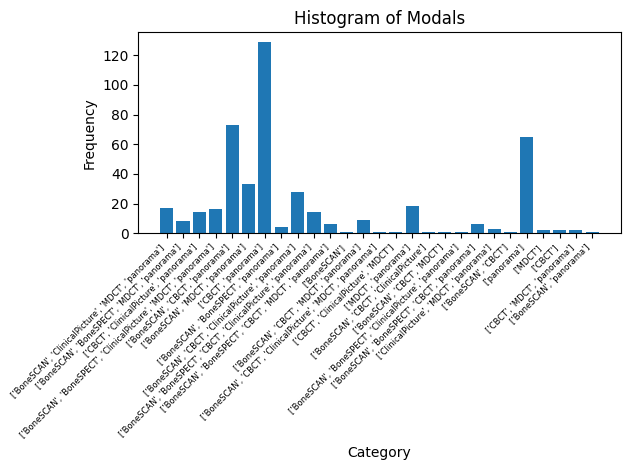

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

accumulator = list()
for patient in X:
    multi_modal = list()
    for folder in glob.glob(patient + "*/"):
        modal = folder.split("/")[-2]
        multi_modal.append(modal)
    multi_modal.sort()
    accumulator.append(str(multi_modal))

category_counts = Counter(accumulator)
assert(sum(category_counts.values()) == len(X))

# Plotting
plt.bar(category_counts.keys(), category_counts.values())

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Modals')
plt.xticks(rotation=45, ha="right", fontsize=6)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()


What if we count CT as one

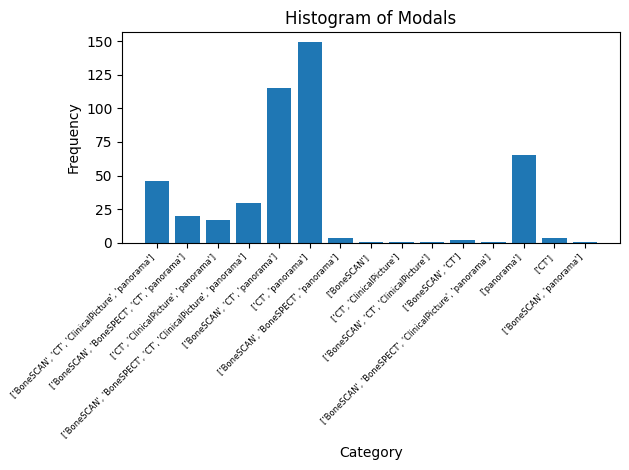

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

accumulator = list()
for patient in X:
    multi_modal = list()
    for folder in glob.glob(patient + "*/"):
        modal = folder.split("/")[-2]
        if modal == "CBCT" or modal == "MDCT":
            modal = "CT"

        if modal not in multi_modal:
            multi_modal.append(modal)

    multi_modal.sort()
    accumulator.append(str(multi_modal))

category_counts = Counter(accumulator)
assert(sum(category_counts.values()) == len(X))

# Plotting
plt.bar(category_counts.keys(), category_counts.values())

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Modals')
plt.xticks(rotation=45, ha="right", fontsize=6)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0357/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0196/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0184/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0488/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0439/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0535/
['CBCT', 'MDCT']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0437/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0343/
['CBCT', 'MDCT']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0454/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0509/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0289/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0495/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0338/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/ONJ/EW-0529/
['CBCT', 'MDCT', 'panorama']: /mnt/4TB1/onj/dataset/v0/Non_ONJ/EW-0243/


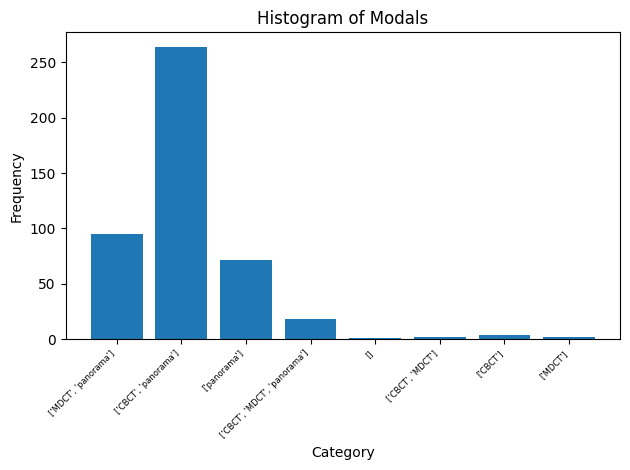

In [26]:
from collections import Counter
import matplotlib.pyplot as plt

accumulator = list()
for patient in X:
    multi_modal = list()
    for folder in glob.glob(patient + "*/"):
        modal = folder.split("/")[-2]
        # if modal == "CBCT" or modal == "MDCT":
        #     modal = "CT"

        if modal == "BoneSCAN" or modal == "BoneSPECT" or modal == "ClinicalPicture":
            continue

        if modal not in multi_modal:
            multi_modal.append(modal)

    multi_modal.sort()
    accumulator.append(str(multi_modal))

    if (str(multi_modal) == "['CBCT', 'MDCT']"):
        print("['CBCT', 'MDCT']: " + patient)

    if (str(multi_modal) == "['CBCT', 'MDCT', 'panorama']"):
        print("['CBCT', 'MDCT', 'panorama']: " + patient)
    

category_counts = Counter(accumulator)
assert(sum(category_counts.values()) == len(X))

# Plotting
plt.bar(category_counts.keys(), category_counts.values())

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Modals')
plt.xticks(rotation=45, ha="right", fontsize=6)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

/mnt/4TB1/onj/dataset/v0/ONJ/EW-0197/


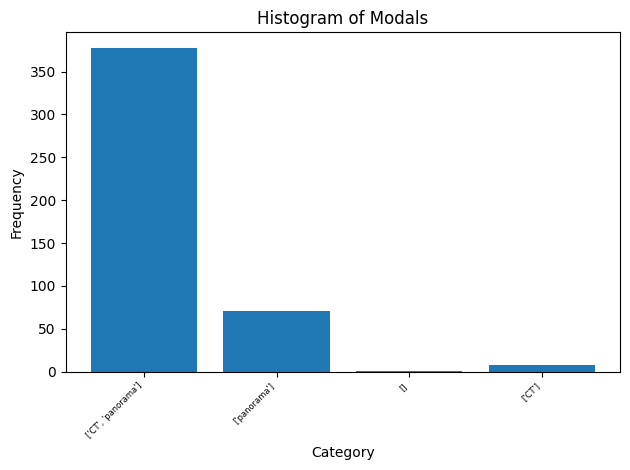

In [23]:
from collections import Counter
import matplotlib.pyplot as plt

accumulator = list()
for patient in X:
    multi_modal = list()
    for folder in glob.glob(patient + "*/"):
        modal = folder.split("/")[-2]
        if modal == "CBCT" or modal == "MDCT":
            modal = "CT"

        if modal == "BoneSCAN" or modal == "BoneSPECT" or modal == "ClinicalPicture":
            continue

        if modal not in multi_modal:
            multi_modal.append(modal)

    multi_modal.sort()
    accumulator.append(str(multi_modal))

    # print(str(multi_modal))

    if (str(multi_modal) == "[]"):
        print(patient)

category_counts = Counter(accumulator)
assert(sum(category_counts.values()) == len(X))

# Plotting
plt.bar(category_counts.keys(), category_counts.values())

plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Histogram of Modals')
plt.xticks(rotation=45, ha="right", fontsize=6)  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout for better fit
plt.show()

Preprocess with cases

case1: CBCT and MDCT both exists -> which to use?

case2: how to use BoneSCAN?

case3: how to use ClincalData

case4: CBCT -> preprocessing to n x m?

case5: MDCT -> preprocessing to n x m?

case6: panorama -> preprocessing to n x m?

case7: 

BoneSPECT

What if I average the CBCT data size and MDCT data size?

In [13]:
from typing import Tuple
import cv2

# DATADIR = "/mnt/4TB1/onj/dataset/v1/"


def avg_shape(data_dir: str, data_type: str, extension: str) -> None:
    """
    data_dir: dataset directory
    data_type: MDCT, CBCT, panorama etc.
    """
    onj = glob.glob(data_dir + "ONJ/*/")
    non_onj = glob.glob(data_dir + "Non_ONJ/*/")

    n = 0  # number of images
    x = 0  # sum of x
    y = 0  # sum of y

    for patient in onj:
        for folder in glob.glob(patient + "*/"):
            if folder.split("/")[-2] == data_type:
                for im in glob.glob(folder + f"/**/*.{extension}", recursive=True):
                    image = cv2.imread(im)
                    x += image.shape[0]
                    y += image.shape[1]
                    n += 1

    for patient in non_onj:
        for folder in glob.glob(patient + "*/"):
            if folder.split("/")[-2] == data_type:
                for im in glob.glob(folder + f"/**/*.{extension}", recursive=True):
                    image = cv2.imread(im)
                    x += image.shape[0]
                    y += image.shape[1]
                    n += 1

    if n > 0:
        print(data_type + f"({n}): " + f"({x / n}, {y / n})")

    else:
        print(f"No images found for {data_type} with extension {extension}.")


def resize(data_dir: str, data_type: str, size: Tuple[int, int], extension: str) -> None:
    onj = glob.glob(data_dir + "ONJ/*/")
    non_onj = glob.glob(data_dir + "Non_ONJ/*/")

    for patient in onj:
        for folder in glob.glob(patient + "*/"):
            if folder.split("/")[-2] == data_type:
                for im in glob.glob(folder + f"/**/*.{extension}", recursive=True):
                    image = cv2.imread(im)
                    image = cv2.resize(image, size)
                    os.makedirs(
                        data_dir + "preprocess/" + "/".join(im.split("/")[-7:-2]), exist_ok=True
                    )
                    cv2.imwrite(
                        data_dir
                        + "preprocess/"
                        + "/".join(im.split("/")[-7:-2])
                        + im.split("/")[-1],
                        image,
                    )


avg_shape(data_dir=DATADIR, data_type="MDCT", extension="jpg")
avg_shape(data_dir=DATADIR, data_type="CBCT", extension="jpg")
avg_shape(data_dir=DATADIR, data_type="panorama", extension="jpg")

KeyboardInterrupt: 

### 2. Split data and create data files.

Split data

In [22]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TODO: later split to train, val, test
# X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)


Create split files

In [7]:
def write_file(file, X, y):
    """
    Write X and y to file in format: X(patient) y(onj_label)
    """
    with open(file, "w") as f:
        for i in range(len(X)):
            f.write(X[i] + " " + str(y[i]) + "\n")

write_file(DATADIR + "train.txt", X_train, y_train)
write_file(DATADIR + "val.txt", X_val, y_val)
# write_file(DATADIR + "test.txt", X_test, y_test)

In [8]:
# show data file format
with open(DATADIR + "train.txt", "r") as f:
    print("train dataset: ", end="")
    print(f.read().split("\n")[:5])

with open(DATADIR + "val.txt", "r") as f:
    print("valid dataset: ", end="")
    print(f.read().split("\n")[:5])

train dataset: ['/mnt/4TB1/onj/dataset/v1/ONJ/EW-0111/ 1', '/mnt/4TB1/onj/dataset/v1/ONJ/EW-0061/ 1', '/mnt/4TB1/onj/dataset/v1/Non_ONJ/EW-0263/ 0', '/mnt/4TB1/onj/dataset/v1/Non_ONJ/EW-0376/ 0', '/mnt/4TB1/onj/dataset/v1/ONJ/EW-0279/ 1']
valid dataset: ['/mnt/4TB1/onj/dataset/v1/Non_ONJ/EW-0220/ 0', '/mnt/4TB1/onj/dataset/v1/ONJ/EW-0436/ 1', '/mnt/4TB1/onj/dataset/v1/Non_ONJ/EW-0045/ 0', '/mnt/4TB1/onj/dataset/v1/ONJ/EW-0064/ 1', '/mnt/4TB1/onj/dataset/v1/ONJ/EW-0464/ 1']


### 3. Set custom dataset

In [9]:
import torch
from torch.utils.data import Dataset

class ONJDataset(Dataset):
    def __init__(self, dataset_dir, version, split):
        pass
    
    def __len__(self):
        pass

    def __getitem__(self, idx):
        pass